## **Problem Statement: Customer Segmentation and Campaign Response Analysis**

## **Dataset: Market Campaign**

### Introduction

This project analyzes customer segmentation and campaign responses to understand wine purchasing behavior. Using demographic, household, and behavioral data, the goal is to identify factors influencing wine spending and improve marketing strategies. Insights from this analysis will help the company target customers effectively, enhance engagement, and boost sales.

## **1. Importing the Required Libraries**



In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **2. Load the Dataset**

In [69]:
#use the files module from google.colab
from google.colab import files
uploaded = files.upload() #prompts you to upload a file

Saving Market_Campaign_Dataset.csv to Market_Campaign_Dataset (2).csv


In [70]:
#for csv files:
import pandas as pd
df = pd.read_csv('Market_Campaign_Dataset.csv')
print(df.head(10))

      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   
5   7348        1958         PhD         Single  71691.0        0         0   
6   4073        1954    2n Cycle        Married  63564.0        0         0   
7   1991        1967  Graduation       Together  44931.0        0         1   
8   4047        1954         PhD        Married  65324.0        0         1   
9   9477        1954         PhD        Married  65324.0        0         1   

  Dt_Customer  Recency  MntWines  Response  
0   6/16/2014        0       189         1  
1   6/15/2014        0       464        

## **3. Inspect the data**

In [71]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Data type information
print("\nData types of columns:")
print(df.dtypes)

First 5 rows of the dataset:
      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  Response  
0   6/16/2014        0       189         1  
1   6/15/2014        0       464         1  
2   5/13/2014        0       134         0  
3  11-05-2014        0        10         0  
4  08-04-2014        0         6         1  

Missing values in each column:
Id                0
Year_Birth        0
Education         0
Marital_Status    0
Income            8
Kidhome           0
Teenhome          0
Dt_Customer       0
Recency           0
MntWines      

## **4. Data Cleaning**

In [72]:
# Handle missing values
df['Income'] = df['Income'].fillna(df['Income'].median())  # Replace missing Income with median

# Verify cleaned data
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Id                0
Year_Birth        0
Education         0
Marital_Status    0
Income            0
Kidhome           0
Teenhome          0
Dt_Customer       0
Recency           0
MntWines          0
Response          0
dtype: int64


In [73]:
# Convert the 'Dt_Customer' column to datetime format
# Use errors='coerce' to replace invalid entries with NaT
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Check for rows with NaT in the 'Dt_Customer' column
invalid_dates = df[df['Dt_Customer'].isna()]
print("Rows with invalid or missing dates:")
print(invalid_dates)

# Handle NaT values
#Replace NaT with a default date (e.g., '2000-01-01')
df['Dt_Customer'].fillna(pd.Timestamp('2000-01-01'), inplace=True)


# Verify changes
print("\nCleaned 'Dt_Customer' column:")
print(df['Dt_Customer'])
print(df.head(10))

Rows with invalid or missing dates:
       Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
3    1386        1967  Graduation       Together  32474.0        1         1   
4    5371        1989  Graduation         Single  21474.0        1         0   
8    4047        1954         PhD        Married  65324.0        0         1   
9    9477        1954         PhD        Married  65324.0        0         1   
11   5642        1979      Master       Together  62499.0        1         0   
..    ...         ...         ...            ...      ...      ...       ...   
988  4646        1951    2n Cycle        Married  78497.0        0         0   
989  6935        1951    2n Cycle        Married  78497.0        0         0   
990  5596        1956    2n Cycle       Together  58821.0        0         1   
993  9076        1980         PhD        Married  30732.0        1         0   
999  2639        1966  Graduation         Single  43602.0        1         1   

   

<ipython-input-73-85145325bdde>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dt_Customer'].fillna(pd.Timestamp('2000-01-01'), inplace=True)


In [74]:
# Ensure Year_Birth has valid integer values
# Replace missing or invalid Year_Birth with a default year (e.g., the median year of birth)
df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')  # Convert to numeric, replacing invalid values with NaN
df['Year_Birth'].fillna(df['Year_Birth'].median(), inplace=True)   # Fill NaN with median year
df['Year_Birth'] = df['Year_Birth'].astype(int)                      # Convert back to integer
print(df.head())

      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  Response  
0  2014-06-16        0       189         1  
1  2014-06-15        0       464         1  
2  2014-05-13        0       134         0  
3  2000-01-01        0        10         0  
4  2000-01-01        0         6         1  


<ipython-input-74-2906a42e931e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year_Birth'].fillna(df['Year_Birth'].median(), inplace=True)   # Fill NaN with median year


## **5. Exploratory Data Analysis**

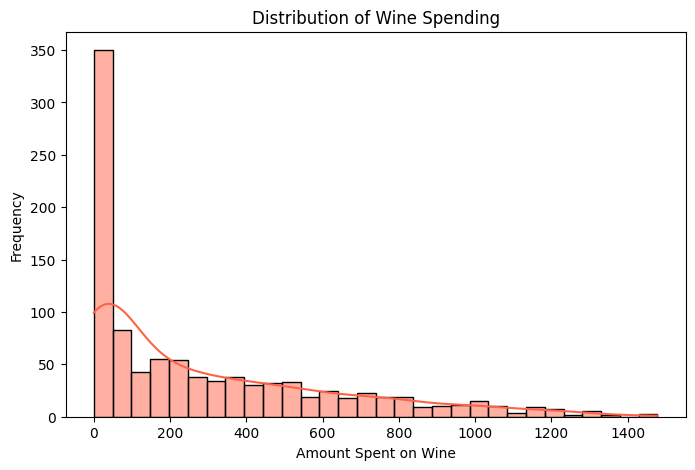

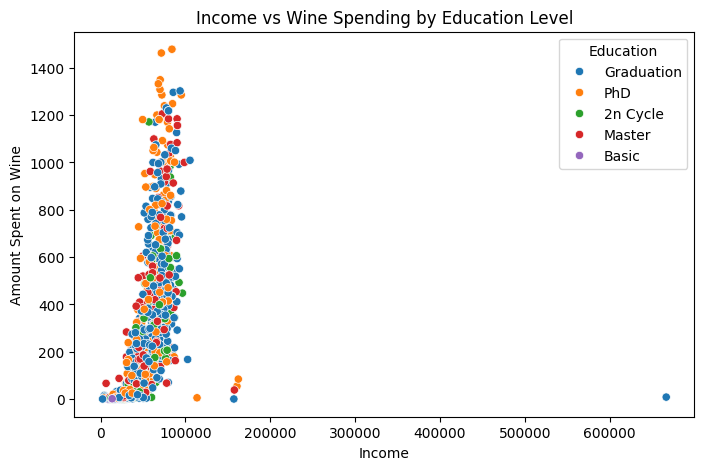

In [75]:
# Distribution of wine spending
plt.figure(figsize=(8, 5))
sns.histplot(df['MntWines'], kde=True, bins=30,color='tomato')
plt.title('Distribution of Wine Spending')
plt.xlabel('Amount Spent on Wine')
plt.ylabel('Frequency')
plt.show()

# Relationship between Income and Wine Spending
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Income', y='MntWines', hue='Education', data=df)
plt.title('Income vs Wine Spending by Education Level')
plt.xlabel('Income')
plt.ylabel('Amount Spent on Wine')
plt.show()

## **6. Feature Engineering**

In [76]:
# Creating Customer Age feature
# Calculate Customer_Age
df['Customer_Age'] = 2024 - df['Year_Birth']

# Check for negative or unrealistic ages (e.g., Age > 120 or < 0)
df = df[(df['Customer_Age'] >= 0) & (df['Customer_Age'] <= 120)]

# Display the first few rows to confirm
print("\nCustomer Age column preview:")
print(df[["Year_Birth","Customer_Age"]].head())


Customer Age column preview:
   Year_Birth  Customer_Age
0        1970            54
1        1961            63
2        1958            66
3        1967            57
4        1989            35


In [77]:
# Creating Tenure feature
# Calculate Tenure (days since the customer joined)
df['Tenure'] = (pd.Timestamp('2024-01-01') - df['Dt_Customer']).dt.days

# Ensure Tenure is positive and realistic
df = df[df['Tenure'] >= 0]

# Display the first few rows to confirm
print("\nTenure column preview:")
print(df[['Dt_Customer', 'Tenure']].head())


Tenure column preview:
  Dt_Customer  Tenure
0  2014-06-16    3486
1  2014-06-15    3487
2  2014-05-13    3520
3  2000-01-01    8766
4  2000-01-01    8766


In [78]:
# Creating income segment and engagement segment feature
# Income Segment
def income_segment(income):
    if income < 30000:
        return 'Low Income'
    elif 30000 <= income < 60000:
        return 'Medium Income'
    else:
        return 'High Income'

df['Income_Segment'] = df['Income'].apply(income_segment)

# Engagement Segment based on Recency
def engagement_segment(recency):
    if recency <= 30:
        return 'Active'
    elif 30 < recency <= 90:
        return 'Lapsed'
    else:
        return 'Dormant'

df['Engagement_Segment'] = df['Recency'].apply(engagement_segment)
print(df.head())

      Id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   1826        1970  Graduation       Divorced  84835.0        0         0   
1      1        1961  Graduation         Single  57091.0        0         0   
2  10476        1958  Graduation        Married  67267.0        0         1   
3   1386        1967  Graduation       Together  32474.0        1         1   
4   5371        1989  Graduation         Single  21474.0        1         0   

  Dt_Customer  Recency  MntWines  Response  Customer_Age  Tenure  \
0  2014-06-16        0       189         1            54    3486   
1  2014-06-15        0       464         1            63    3487   
2  2014-05-13        0       134         0            66    3520   
3  2000-01-01        0        10         0            57    8766   
4  2000-01-01        0         6         1            35    8766   

  Income_Segment Engagement_Segment  
0    High Income             Active  
1  Medium Income             Active  
2 

## **7. Data Visualization**

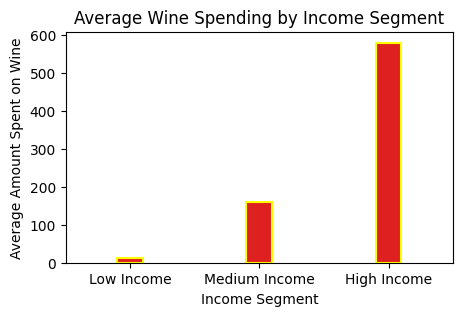

In [79]:
# Average Wine Spending by Income Segment
income_segment_analysis = df.groupby('Income_Segment')['MntWines'].mean().reset_index()

# Bar chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
sns.barplot(x='Income_Segment', y='MntWines', data=income_segment_analysis, order=['Low Income', 'Medium Income', 'High Income'],color='r',width=0.2,edgecolor='yellow',linewidth=1.5)
plt.title('Average Wine Spending by Income Segment')
plt.xlabel('Income Segment')
plt.ylabel('Average Amount Spent on Wine')
plt.show()

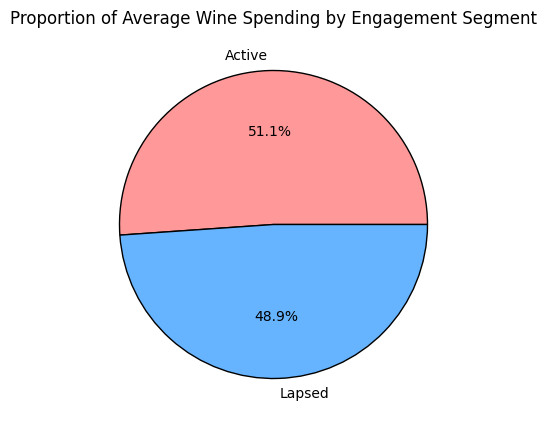

In [80]:
# Pie Chart for Average Wine Spending by Engagement Segment
engagement_segment_analysis = df.groupby('Engagement_Segment')['MntWines'].mean()

plt.figure(figsize=(5,5))
engagement_segment_analysis.plot(kind='pie', autopct='%1.1f%%', colors=['#FF9999','#66B3FF','#99FF99'],wedgeprops={'linewidth':1,'edgecolor':'black'})
plt.title('Proportion of Average Wine Spending by Engagement Segment')
plt.ylabel('')  # Hides y-axis label
plt.show()

<ipython-input-81-5f1a9e0be5da>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Marital_Status', y='MntWines', data=df, palette='muted')


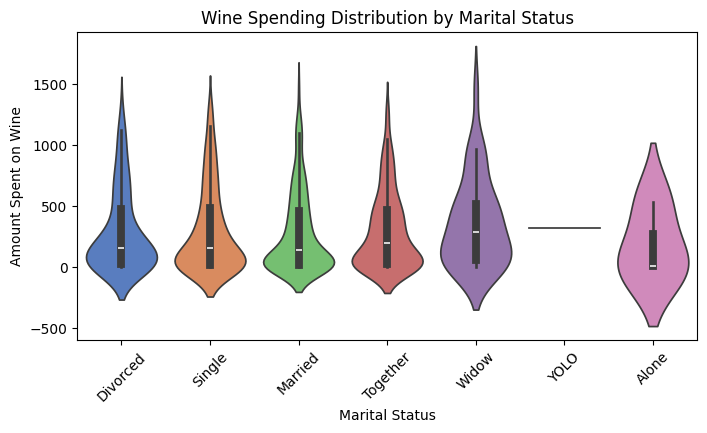

In [81]:
# Violin Plot for Wine Spending by Marital Status
plt.figure(figsize=(8, 4))
sns.violinplot(x='Marital_Status', y='MntWines', data=df, palette='muted')
plt.title('Wine Spending Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Amount Spent on Wine')
plt.xticks(rotation=45)
plt.show()

<ipython-input-82-73b8e462c97f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education' ,y='MntWines', data=df, palette='Set2')


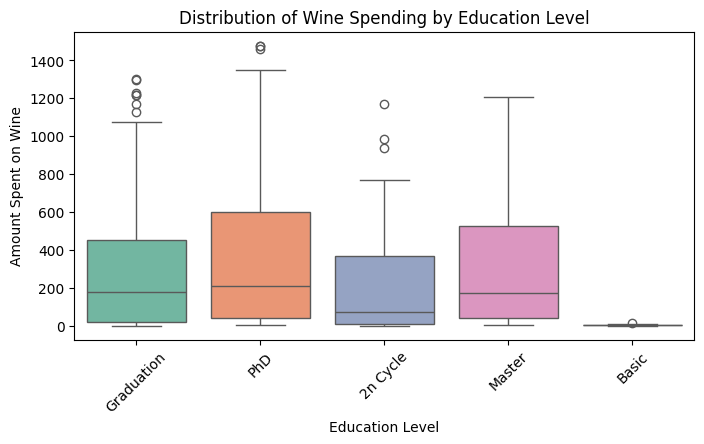

In [82]:
# Box Plot for Wine Spending by Education Level
plt.figure(figsize=(8, 4))
sns.boxplot(x='Education' ,y='MntWines', data=df, palette='Set2')
plt.title('Distribution of Wine Spending by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Amount Spent on Wine')
plt.xticks(rotation=45)
plt.show()

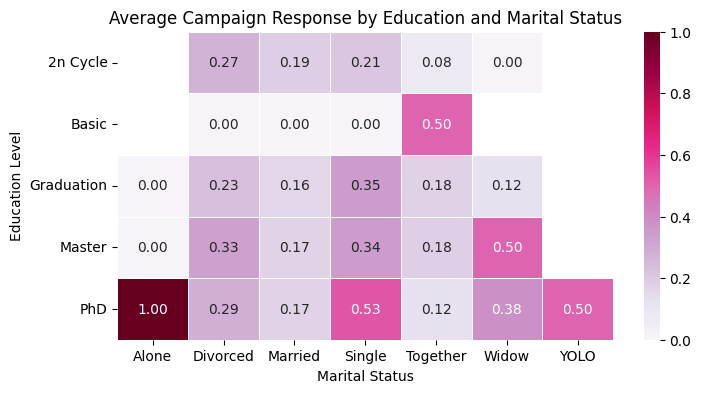

In [83]:
# Pivot the data for heatmap
heatmap_data = df.pivot_table(values='Response', index='Education', columns='Marital_Status', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(heatmap_data, annot=True, cmap='PuRd', fmt=".2f", linewidths=0.5)
plt.title('Average Campaign Response by Education and Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Education Level')
plt.show()

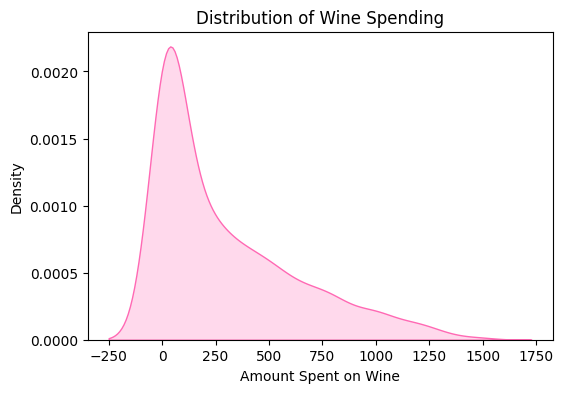

In [84]:
# KDE plot for wine spending
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='MntWines', fill=True, color='hotpink')
plt.title('Distribution of Wine Spending')
plt.xlabel('Amount Spent on Wine')
plt.ylabel('Density')
plt.show()

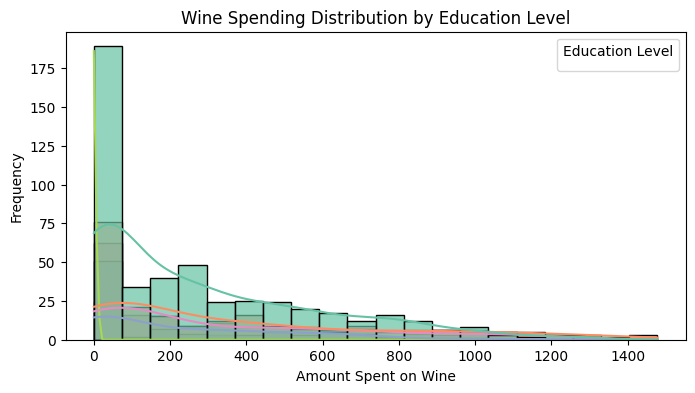

In [85]:
# Histogram by education level
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='MntWines', hue='Education', bins=20, kde=True, palette='Set2', alpha=0.7)
plt.title('Wine Spending Distribution by Education Level')
plt.xlabel('Amount Spent on Wine')
plt.ylabel('Frequency')
plt.legend(title='Education Level')
plt.show()

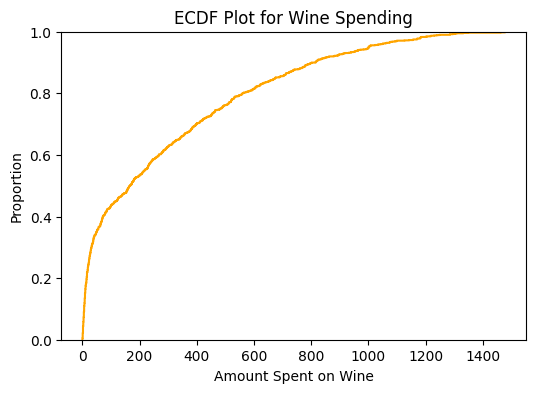

In [86]:
# ECDF plot for wine spending
plt.figure(figsize=(6, 4))
sns.ecdfplot(data=df, x='MntWines', color='orange')
plt.title('ECDF Plot for Wine Spending')
plt.xlabel('Amount Spent on Wine')
plt.ylabel('Proportion')
plt.show()

## **Workflow of Data Analysis**

**1. Data Cleaning**
*   Handling Missing Values: Filling missing Income and Year_Birth values with the median ensures data consistency.
*   Fixing Invalid Entries: Converting Dt_Customer to datetime and replacing invalid or missing dates with defaults.
*   Ensuring Correct Data Types: Converting Year_Birth to numeric, correcting invalid values, and maintaining proper formats.



**2. Exploratory Data Analysis**
*   Understanding Distributions of MntWines features
*   Identifying Relationships betweeen MntWines and Income

**3. Feature Engineering**
*   New Feature Creation: Adding meaningful features like Customer_Age (calculated from Year_Birth) or Tenure (days since joining) to better represent data.
*   Segmentation: Grouping data into categories such as Income_Segment (Low, Medium, High) or Engagement_Segment (Active, Lapsed, Dormant) for easier analysis.

**4. Data Visualization**
*   Bar Charts: Highlight comparisons, such as average wine spending across income segments.
*   Pie Charts: Show proportions, like wine spending by engagement segment.
*   Violin and Box Plots: Display distributions and variability of wine spending across groups (e.g., marital status, education level).

**5. Insights Extraction**
*   The visualizations reveal key insights:

1. **Income and Spending**: Higher income segments spend more on wine on average.
2. **Engagement**: Active customers contribute the largest share of average wine spending.
3. **Marital Status**: Spending patterns vary significantly, with some statuses showing higher variability.
4. **Education**: Higher education levels generally correspond to higher wine spending.







### Conclusion

The analysis revealed that demographic factors (age, education, marital status), household size, and customer engagement metrics like tenure and recency significantly impact wine spending. Customers with higher education, stable marital status, and smaller households tend to spend more. Marketing campaigns can be optimized using these insights to improve targeting, enhance customer retention, and drive sales growth.